<div dir="rtl">
<table>
  <tr>
    <td>
      <img src="../../shared/pics/school_logo.jpeg" width="150" />
    </td>
    <td>
      <p>
        <b>עירוני ד׳ תל-אביב</b>
      </p>
    </td>
  </tr>
</table>
</div>

Student name: , ID: 


Research Name: Can a chess game's elo be predicted only by its features?

Teacher Name: Itay Be'erly, Year: 2024

## <span dir=rtl>Research Subject - 2</span>

*2.1* This research tries to match a lot of factors that describe a game of chess to that game's elo (בעברית: מד כושר) - the average level of the players in chess.

<div dir = "rtl">
<img src = "pics/illustration.png" />
</div>

## <span dir=rtl>Data Description - 3</span>

*3.1-3* This is a database about chess games that it's data was collected at 2020.
The database consists of more than 20,000 chess games from the online chess server [Lichess](https://lichess.org). The database holds many types of information about these games, including the opening, the players' elos and much more.
The database was uploaded to [Kaggle (link to the database)](https://www.kaggle.com/datasets/penchalaiah123/chess-game-dataset/data) and was last updated in 2020. This database was published by "PRAVEEN KUMAR" (a user in kaggle) - but was taken from Lichess.

*3.4* The columns in this database are:



*   Game ID: The ID of the game. Each game has a unique Id. This information is not
important to the research and will be deleted later.
*   Rated: A rated game is a game which will cause changes in the players' elos that depends on the game's outcome. Therefore, the column will consist the data about if the game was rated by True / False for each game.
*   Start Time, End Time: This information is the data of the program that the games were played in. It is not relevant for my research because it does not have information about the game therfore it will be deleted as well.
*   Number of Turns: This column consists of the number of turns for each game. A turn is two moves - one made by white and one made by black (and in case of a victory or a draw one move will count as a whole turn).
*   Victory Status: This column will contain how the game was ended (mate, draw, outoftime, resignation and more...)
*   Winner: What color was the winner, or if there was a draw.
*   Time Increment: A time increment is the time frame the game is played on. For example, if the time increment is 15+2, than both of the players have 15 minutes each before their time runs out, and after each move they play they get an additional 2 seconds.
*   White / Black Player ID: The name of the players, this information is not relevant to the research.
*   White / Black Player Rating: The elo of the players, as explained before, this information shows how good the players are - this information is the information I will try to predict in this research.
*   All Moves in Standard Chess Notation: In this column there will be all the moves in the game in chess notation (for example - Nc3+ means that the knight moved to c3 and has given a check).
*   Opening Eco: The chess notation for the opening (usually a letter than two digits), with this information we will be able to predict the player's elo.
*   Opening Name: The name of the opening, for those who don't know how to read the opening ECO.
*   Opening Ply: the number of moves that were played into the opening before leaving the theory.

I will try to predict the elo of a game by the opening the players played, as well as the number of moves played into the opening, the number of turns, how the game ended, if it was rated, the color of the winner and it's increment code. The target column is the avrage elo of the players who played this game (this colummn will be added later).

In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import sklearn as lrn
from feature_engine.outliers import Winsorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, \
                            make_scorer, accuracy_score, f1_score, recall_score, \
                            mean_squared_error, mean_absolute_error
from os import path

In [2]:
import sys
sys.path.append('../../')

from shared.code import helpers

## <span dir=rtl>Data Investigation - 4</span>

In [3]:
#import the dataset from drive #4.1
df = pd.read_csv('data/static/dataset.csv')

In [4]:
df.head() #4.1

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In the dataset, there are 10 different categories (I explained them in the "Data Description" part). From them, I will mostly use the "turns", "opening eco", "opening ply" and "avg rating" collumn.

The names of the players and the games' id are not important to my research. In addition, my research does not care about the the time in which the games have started, as well as it does not care about the time that they ended.
Therefore, I will remove them from my table.
I will also add a column with the avg rating of the players.
Because in this research I will predict the elo of a *game* the ratings of the players are not important as well. The moves of the game are not important to this research as well (there is not much that can be done with the moves in the game with the material we learned in class). The opening name is not important as well because I already have it in chess notation in the colummn 'opening_eco'.

In [5]:
games = df
# new colummn that will consist the game's elo
row_avg = games[["white_rating", "black_rating"]].mean(axis=1)
games["avg_rating"] = row_avg
#remove the un-important columns
games = df.drop(["created_at","last_move_at","white_id","white_rating", "black_rating", "black_id","id",'moves','opening_name'], axis = 1)


In [6]:
#view of the data frame #4.1
games.head()

,rated,turns,victory_status,winner,increment_code,opening_eco,opening_ply,avg_rating
0,False,13,outoftime,white,15+2,D10,5,1345.5
1,True,16,resign,black,5+10,B00,4,1291.5
2,True,61,mate,white,5+10,C20,3,1498.0
3,True,61,mate,white,20+0,D02,3,1446.5
4,True,95,mate,white,30+3,C41,5,1496.0


In [7]:
# This code creates "bins" for the different ranges of elos
games["cat_avg_rating"] = LabelEncoder().fit_transform(pd.qcut(games['avg_rating'],q = 6)) #divide into 6 categories that the algorithm will try to predict
#label encoder assigns a number for each category

In [8]:
# This code will make the the 'increment code' column numerical and change the 'opening eco' colummn to be with only 5 categories
games['opening_eco'] = games['opening_eco'].apply(lambda x: x[0])
games['increment_code'] = games['increment_code'].apply(lambda x: x.split('+')[0])
games['increment_code'] = games['increment_code'].astype('float')
# As explained before, an opening's eco consists of a letter (a through e) than 2 numbers, after a little bit of research on the internet, it has come to my attention that the first letter in an
#opening's eco represents the style of game that fits the opening (for example, the letter 'B' means that the game is a semi-open game other than the french defense - 'semi-open' says that the game
#started with 1.e4 and black breakes symmetry immidiately and leads to an open game)

In [9]:
#Remove the unirelevant increment code - in a time increment called 'bullet' the game is not about openings but more about time manipulation
games = games[games['increment_code'] > 2]

In [10]:
#Take a sample of the data frame
games = games.sample(frac = 0.75, random_state = 42, replace = True) #take half of the data - for faster gridsearch later

### <span dir=rtl>Data Description - 4.2-3</span>

In [11]:
#Information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14945 entries, 15909 to 14971
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           14945 non-null  bool   
 1   turns           14945 non-null  int64  
 2   victory_status  14945 non-null  object 
 3   winner          14945 non-null  object 
 4   increment_code  14945 non-null  float64
 5   opening_eco     14945 non-null  object 
 6   opening_ply     14945 non-null  int64  
 7   avg_rating      14945 non-null  float64
 8   cat_avg_rating  14945 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 1.0+ MB


In [12]:
#Description of the data
games.describe()

,turns,increment_code,opening_ply,avg_rating,cat_avg_rating
count,14945.000000,14945.000000,14945.000000,14945.000000,14945.000000
mean,60.421479,14.069588,4.753697,1590.297524,2.479558
std,33.359514,18.103633,2.771697,262.034413,1.713172
min,1.000000,3.000000,1.000000,827.000000,0.000000
25%,37.000000,10.000000,3.000000,1405.000000,1.000000
50%,55.000000,10.000000,4.000000,1564.000000,2.000000
75%,78.000000,15.000000,6.000000,1771.000000,4.000000
max,349.000000,180.000000,28.000000,2475.500000,5.000000


In [13]:
#Division to X and y
X = games.drop('cat_avg_rating',axis = 1)
X.drop('avg_rating',axis=1, inplace=True)
y = games['cat_avg_rating']

In [14]:
#description of X
X.describe()

,turns,increment_code,opening_ply
count,14945.000000,14945.000000,14945.000000
mean,60.421479,14.069588,4.753697
std,33.359514,18.103633,2.771697
min,1.000000,3.000000,1.000000
25%,37.000000,10.000000,3.000000
50%,55.000000,10.000000,4.000000
75%,78.000000,15.000000,6.000000
max,349.000000,180.000000,28.000000


### <span dir=rtl>Visual Data Exploration - 4.4-6</span>

In [15]:
#division to train and test - in the 'competition' the participant trains on the the X_test, y_test datasets and tries to predict the y_test based on the X_test
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2 , random_state=2)

In [16]:
games.groupby(by = 'opening_eco')['avg_rating'].mean() #4.4

opening_eco
A    1586.619359
B    1624.784866
C    1545.745907
D    1612.734906
E    1828.827824
Name: avg_rating, dtype: float64

As can be seen here, there is not much corralation between the games' rating and the kind of openings that was played in the game (from these 5 categories).
This information shows that it will have a minor impact on the prediction. More explanaition later.

In [17]:
df['increment_code'] = df['increment_code'].apply(lambda x: x.split('+')[0]) #explained before
df['increment_code'] = df['increment_code'].astype('float')

In [18]:
df.groupby(by = 'victory_status')['increment_code'].mean() #4.4

victory_status
draw         17.101545
mate         13.362213
outoftime    12.153571
resign       14.071589
Name: increment_code, dtype: float64

As expected, the 'outoftime' category has the smallest amount of time in games, which makes sense.

In [19]:
# in the following code I will create a graph the number of games played per each of the 5% most used openings
openings = df.opening_eco.value_counts() #count the number of openings
row_num = int(openings.shape[0] * 0.05) #find the amounts of openings
openings_5p = openings.head(row_num) #choose the openings

Text(0.5, 1.0, 'Number of Games per each of the 5% most used openings')

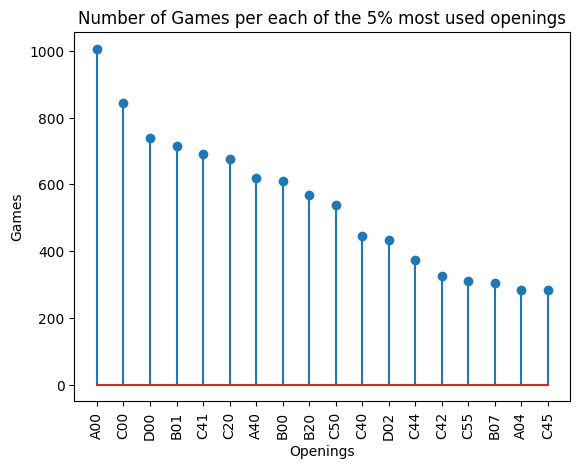

In [20]:
plt.stem(openings_5p.values) #plot
plt.xticks(np.arange(row_num), openings_5p.index.values, rotation = 90)
plt.xlabel('Openings')
plt.ylabel('Games')
plt.title('Number of Games per each of the 5% most used openings')

This graph represents the number of games played with each opening (but only the top 5% of the most used openings)

Actually, this information is not suprising at all. As can be seen in the table below, the chess notation 'A00' is given to
'uncommon openings', which is a list of openings that are not played a lot in competitive games. Since it is given to so many openings, it seems obvious that this opening is the most popular opening. The next opening is the french defense (C00), which is a very popular opening.

In [21]:
# drop all colummns but the opening eco and the name of the opening
df_eco_name = df.drop(["created_at","last_move_at","white_id","white_rating", "black_rating", "black_id","id",'moves','winner','rated','increment_code','opening_ply','avg_rating','victory_status','turns'], axis = 1)
df_eco_name[df_eco_name['opening_eco'] == 'A00'] #choose each row with opening eco of A00

,opening_eco,opening_name
10,A00,Van't Kruijs Opening
83,A00,Crab Opening
193,A00,Hungarian Opening
195,A00,Van't Kruijs Opening
215,A00,Crab Opening
...,...,...
19963,A00,Polish Opening: Czech Defense
19966,A00,Polish Opening
19968,A00,Polish Opening
19976,A00,Polish Opening


In addition to the name of the opening, it is also important to know the number of moves that were played into the opening. This information is important beacause it can tell us the real connection between a player's elo and the kind of openings he plays, becaues even one move into an opening will automaticly change the chess notation to that opening.

C:\Users\isc\AppData\Local\Temp\ipykernel_11204\3466041497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_games = games.groupby('binned')['opening_ply'].mean().reset_index() #groupby to get avrage


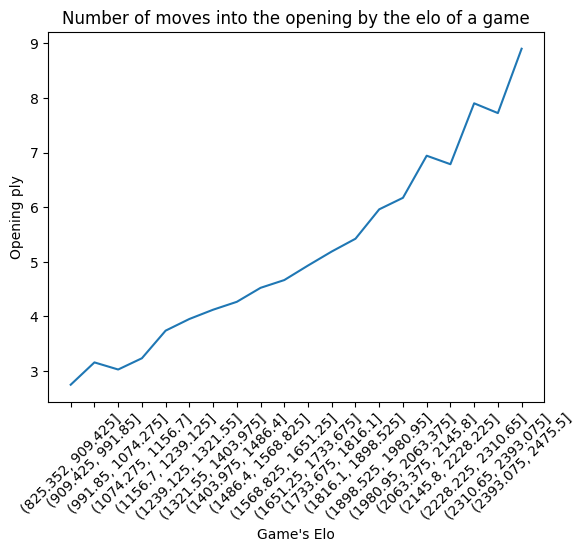

In [22]:
games['binned'] = pd.cut(games['avg_rating'], bins = 20) #cut the range of elos to smaller groups
grouped_games = games.groupby('binned')['opening_ply'].mean().reset_index() #groupby to get avrage
grouped_games['binned'] = grouped_games['binned'].astype(str) #change type to sring
sns.lineplot(data=grouped_games, x='binned', y='opening_ply') #create a lineplot
plt.xticks(rotation=45) #rotate the x axis for better view
plt.xlabel('Game\'s Elo')
plt.ylabel('Opening ply')
plt.title('Number of moves into the opening by the elo of a game')
plt.show()

As can be seen in this graph, there is a rising trend in the number of moves that were played into the opening as the elo rises. This makes sense, because stronger players (players that have more elo) tend to learn more of the openings.

Another important thing to notice is the number of turns in the game. In the following graph I will present the connection between a player's elo and the number of moves in the game.

C:\Users\isc\AppData\Local\Temp\ipykernel_11204\216887742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_games = games.groupby('binned')['turns'].mean().reset_index() #mean


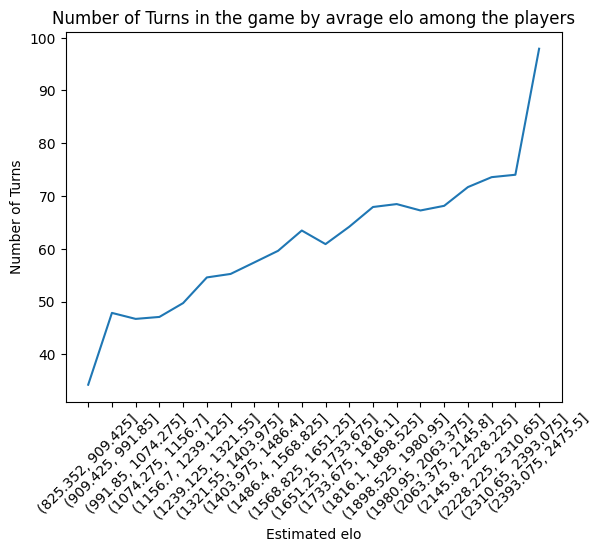

In [23]:
games['binned'] = pd.cut(games['avg_rating'], bins=20) #cut the ratings into bins
grouped_games = games.groupby('binned')['turns'].mean().reset_index() #mean
grouped_games['binned'] = grouped_games['binned'].astype(str)
sns.lineplot(data=grouped_games, x='binned', y='turns')
plt.xticks(rotation=45)
plt.xlabel('Estimated elo')
plt.ylabel('Number of Turns')
plt.title('Number of Turns in the game by avrage elo among the players')
plt.show()

In this plot, we can see that the stronger the players are, there are more moves in the game. This is also very logical, because games played by stronger players will be much more "close" and both of the players will fight a long time before any significant result on the board will be shown. Stronger players tend to fight not only for material (pieces) but for tactiacl and strategic advantage.

Let's check the correlation between the elo and the time increment of a game

C:\Users\isc\AppData\Local\Temp\ipykernel_11204\3496582102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_games = games.groupby('binned')['increment_code'].mean().reset_index()


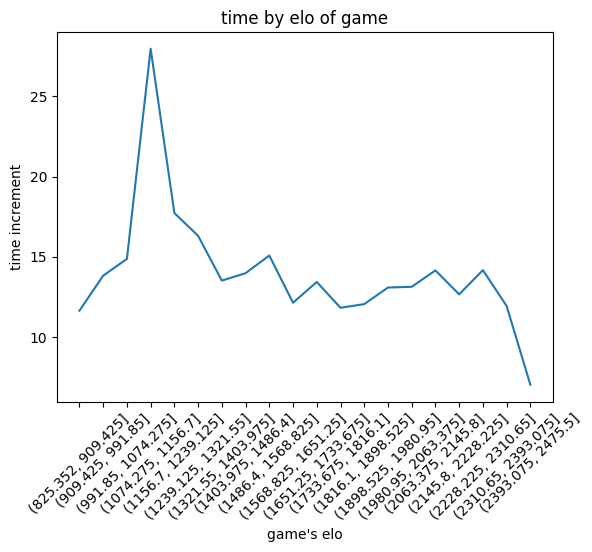

In [24]:
grouped_games = games.groupby('binned')['increment_code'].mean().reset_index()
grouped_games['binned'] = grouped_games['binned'].astype(str)
sns.lineplot(data=grouped_games, x='binned', y='increment_code')
plt.xticks(rotation=45)
plt.xlabel('game\'s elo')
plt.ylabel('time increment')
plt.title('time by elo of game')
plt.show()

It seems from this that players with lesser elo tend to play games with more time on the clock. Stronger players tend to play quicker games.

Text(0.5, 1.0, 'Boxplot of turns')

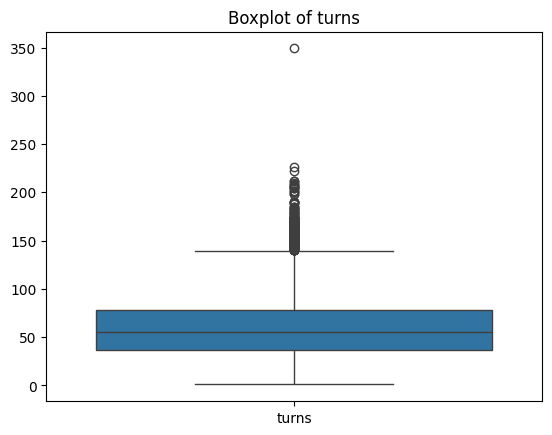

In [25]:
sns.boxplot(data = games[['turns']]) #create a boxplot to see the distribution among the turns in the dataset
plt.title('Boxplot of turns')
#lower edge of boxplot - 25% is under the line
#upper edge - 75% are below the line
#box - 50% if the data
#line in the box - median
#whiskers - 1.5*(upperedge - loweredge)
#boxplot = outliers

Most of the games are between 35 moves to 75 moves

Text(0.5, 1.0, 'Boxplot of ratings')

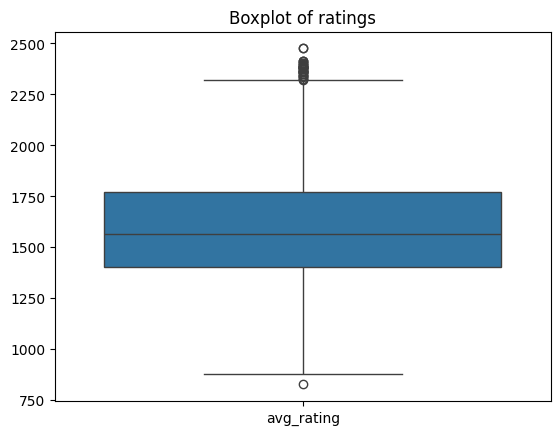

In [26]:
sns.boxplot(data = games[['avg_rating']]) #create a boxplot to see the distribution among the games' ratings in the dataset
plt.title('Boxplot of ratings') #set title

Most of the ratings are from 1400 to 1750. This is a intermediate level chess games. In the ideal dataset all the games are from pro players but this is good enough.

Text(0.5, 1.0, 'histplot of kinds of openings')

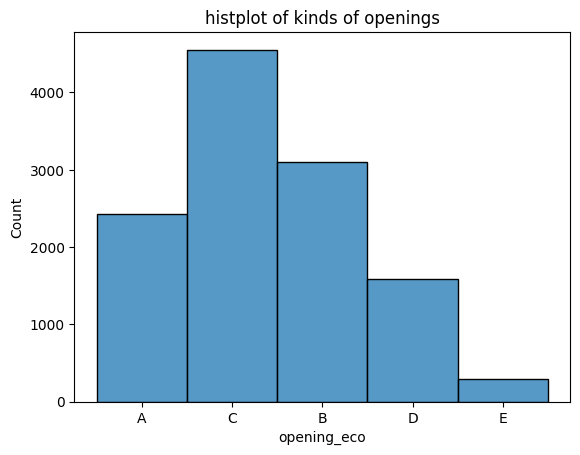

In [27]:
opening_style = X_train['opening_eco']
sns.histplot(opening_style)
plt.title('histplot of kinds of openings')
#histplot to see how much of the table falls to each category in the openign eco category

as can be seen here, most of the games start with an opening that falls to the 'C' section and there are only a few games that starts with opening eco from the kind 'E'

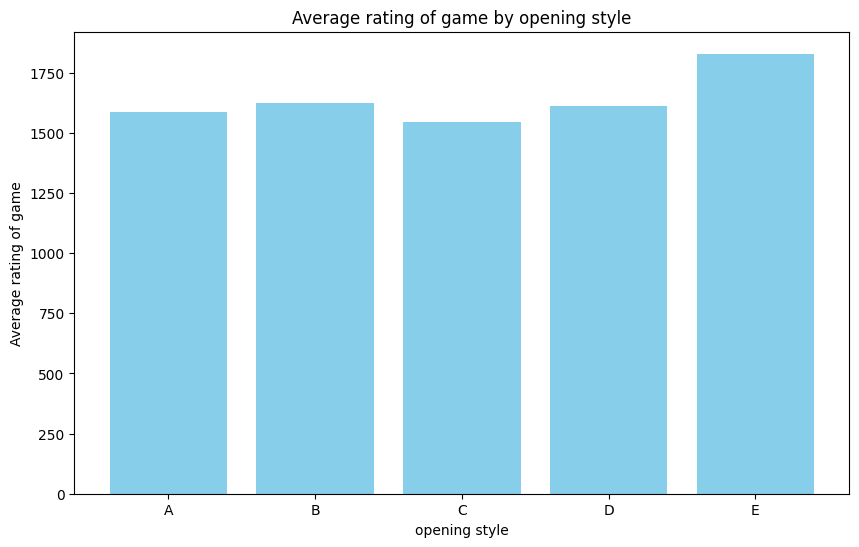

In [28]:
#rating by opening style - 4.4
grouped_games_eco_rating = games.groupby('opening_eco')['avg_rating'].mean().reset_index() #same as before

plt.figure(figsize=(10, 6)) #change size of figure
plt.bar(grouped_games_eco_rating['opening_eco'], grouped_games_eco_rating['avg_rating'], color='skyblue') #groupby
plt.xlabel('opening style')
plt.ylabel('Average rating of game')
plt.title('Average rating of game by opening style')
plt.show()

As can be seen in the graph, there is not much difference between the 5 categories in the 'opening_eco' colummn in terms of the games' avrage ratings. by this fact I will predict a weak corralation between those colummns in the correlation matrix. Also, as can be seen here, the least played opening style (from last graph) is actually the one where the avrage rating is the highest. from this, we can tell that stronger players tend to play more of the 'E' openigs than weaker players.  

In [29]:
train_corr = X_train.corr(numeric_only = True) #only numerical values
train_corr #corralation values

,rated,turns,increment_code,opening_ply
rated,1.000000,0.112653,-0.121953,0.014318
turns,0.112653,1.000000,-0.057782,0.048332
increment_code,-0.121953,-0.057782,1.000000,-0.037218
opening_ply,0.014318,0.048332,-0.037218,1.000000


Text(0.5, 1.0, 'Correlations matrix')

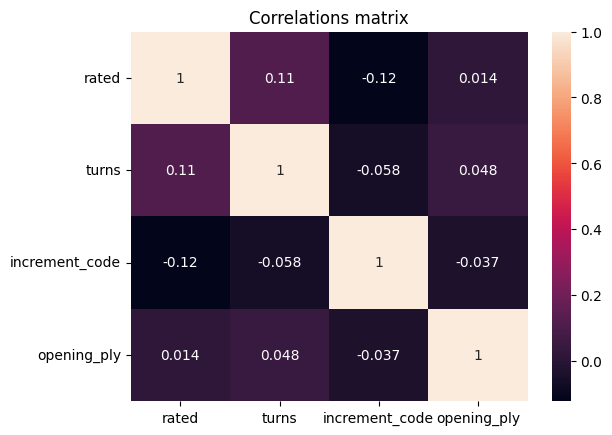

In [30]:
sns.heatmap(train_corr, annot = True) #corralation matrix
plt.title('Correlations matrix')

As can be seen here and in the plots before (and as expected) there is no significant correlation between the columns, but there is a corraltion between them and the target column (as shown in the plots above)

From this heatmap, as well as in all the plots that have been shown, rises the conclusion: higher rated players have longer games (in terms of moves). In those games, the players will stick to the theory much more (there is a rising trend in the number of moves played into the opening when the players get stronger) and most of the stronger players will prefer faster games.

## <span dir=rtl>Data Processing - 5</span>

In [31]:
lrn.set_config(transform_output = 'pandas') #makes every output a panda dataset

In [32]:
num_cols = ['turns','increment_code','opening_ply'] #the numerical columns that will be transformed with the numerical steps
cat_cols = ['winner','rated','victory_status','opening_eco'] #the categorial columns that will be transformed with the categorial steps

In [33]:
num_steps = [('fill_na', SimpleImputer(strategy = 'mean') ),('cap_outliers', Winsorizer()),
              ('standardize', MinMaxScaler())]
cat_steps = [('fill_na', SimpleImputer(strategy = 'most_frequent')),('standardize', OneHotEncoder(sparse_output = False))]
#winzorizer calculates the mean and the std and caps all the values to the closest 3*std values
#here I choose the steps for the column transformer
#oridinal encoder is for categorial columns with a natural oreder. My column has no natural order and only 5 categories therefore I used onehotencoder.

In [34]:
preprocessor_parts = [('numerical', Pipeline(steps = num_steps), num_cols),
                      ('categorical', Pipeline(steps = cat_steps), cat_cols)] #the parts of the column transformer

In [35]:
preprocessor = ColumnTransformer(transformers = preprocessor_parts,
                                 verbose_feature_names_out = False, #can't change the names of the columns
                                 n_jobs = -1 #different processor
                                 )
preprocessor #view of the column transformer

ColumnTransformer(n_jobs=-1,
                  transformers=[('numerical',
                                 Pipeline(steps=[('fill_na', SimpleImputer()),
                                                 ('cap_outliers', Winsorizer()),
                                                 ('standardize',
                                                  MinMaxScaler())]),
                                 ['turns', 'increment_code', 'opening_ply']),
                                ('categorical',
                                 Pipeline(steps=[('fill_na',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardize',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['winner', 'rated', 'victory_status',
                                  'opening_eco'])],
                  verbose_feature_names_out=False)

In [36]:
X_train_prcsd = preprocessor.fit_transform(X_train) #fit

In [37]:
placeholder_classifier = KNeighborsClassifier(n_neighbors = 1) #just a placeholder

In [38]:
clf_steps = [('preprocess', preprocessor),
             ('classifier', placeholder_classifier)] #calssifier steps

In [39]:
clf = Pipeline(steps = clf_steps)
clf #view of the classificator (in the pipeline)


#pipeline is used to chain multiple different steps including preprocessing and modeling
#colummn transformer is used to apply different preprocessing steps to different columns

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('fill_na',
                                                                   SimpleImputer()),
                                                                  ('cap_outliers',
                                                                   Winsorizer()),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['turns', 'increment_code',
                                                   'opening_ply']),
                                                 ('categorical',
                                                  Pipeline(steps=[('fill_na',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardize',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['winner', 'rated',
                                                   'victory_status',
                                                   'opening_eco'])],
                                   verbose_feature_names_out=False)),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])

In [41]:
params = [  {
              'preprocess__numerical__standardize': [MinMaxScaler(),StandardScaler()],
              'preprocess__numerical__cap_outliers': [helpers.identity_transformer, Winsorizer()],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [1,3,5,7] #after input if [1,10,100] in this grid the gs returned 1, so this is the check for the closest options to 1
            },
            {
              'preprocess__numerical__standardize': [MinMaxScaler(),StandardScaler()],
              'preprocess__numerical__cap_outliers': [helpers.identity_transformer, Winsorizer()],
              'classifier':[SVC(random_state= 2)],
              'classifier__C': [0.1,1, 10, 100],
              'classifier__kernel': ['poly', 'rbf']
            }
         ]
         #the parameters that the grid will check
         #MinMaxScaler: scales features to a range, typically [0,1]
         #MaxAbsScaler: scales features by their maximum absolute values. [-1,1]
         #makes mean = 0 and standard deviation = 1

         #C controls the trade-off between fitting the training data perfectly and having a decision boundary that generalizes well to new data
         #large C = more emphasis on classifying all
         #small C = allows some misclassifications

         #reasons for standarization: 1. compatability with algorithms 2. improving preformance 3. preserving realationships and patterns

In [42]:
y_train.value_counts() #check if the target column is balanced

cat_avg_rating
0    2059
4    2046
1    2012
2    2003
5    1950
3    1886
Name: count, dtype: int64

as can be seen here, the target column is balanced. Therefore, no normalization is needed.

## <span dir=rtl>Machine Learning - 6</span>

In [43]:
scorer = make_scorer(accuracy_score)

In [44]:
gs = GridSearchCV(estimator = clf,
                  param_grid = params,
                  scoring = scorer,
                  n_jobs = -1,
                  verbose= 10,
                  error_score= 'raise')
#create grid search: using the params and assigning the run to different processors

In [45]:
gs = helpers.fit(gs, X_train, y_train)

original fit duration: 01:45:59


In [46]:
gs.best_params_ #best parameters

{'classifier': KNeighborsClassifier(),
 'classifier__n_neighbors': 1,
 'preprocess__numerical__cap_outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x0000023D35F419E0>),
 'preprocess__numerical__standardize': MinMaxScaler()}

In [47]:
gs.best_score_ #best score

np.float64(0.4992475266082816)

😞
but this was expected (explanation below)

<Axes: title={'center': 'Correlations matrix'}>

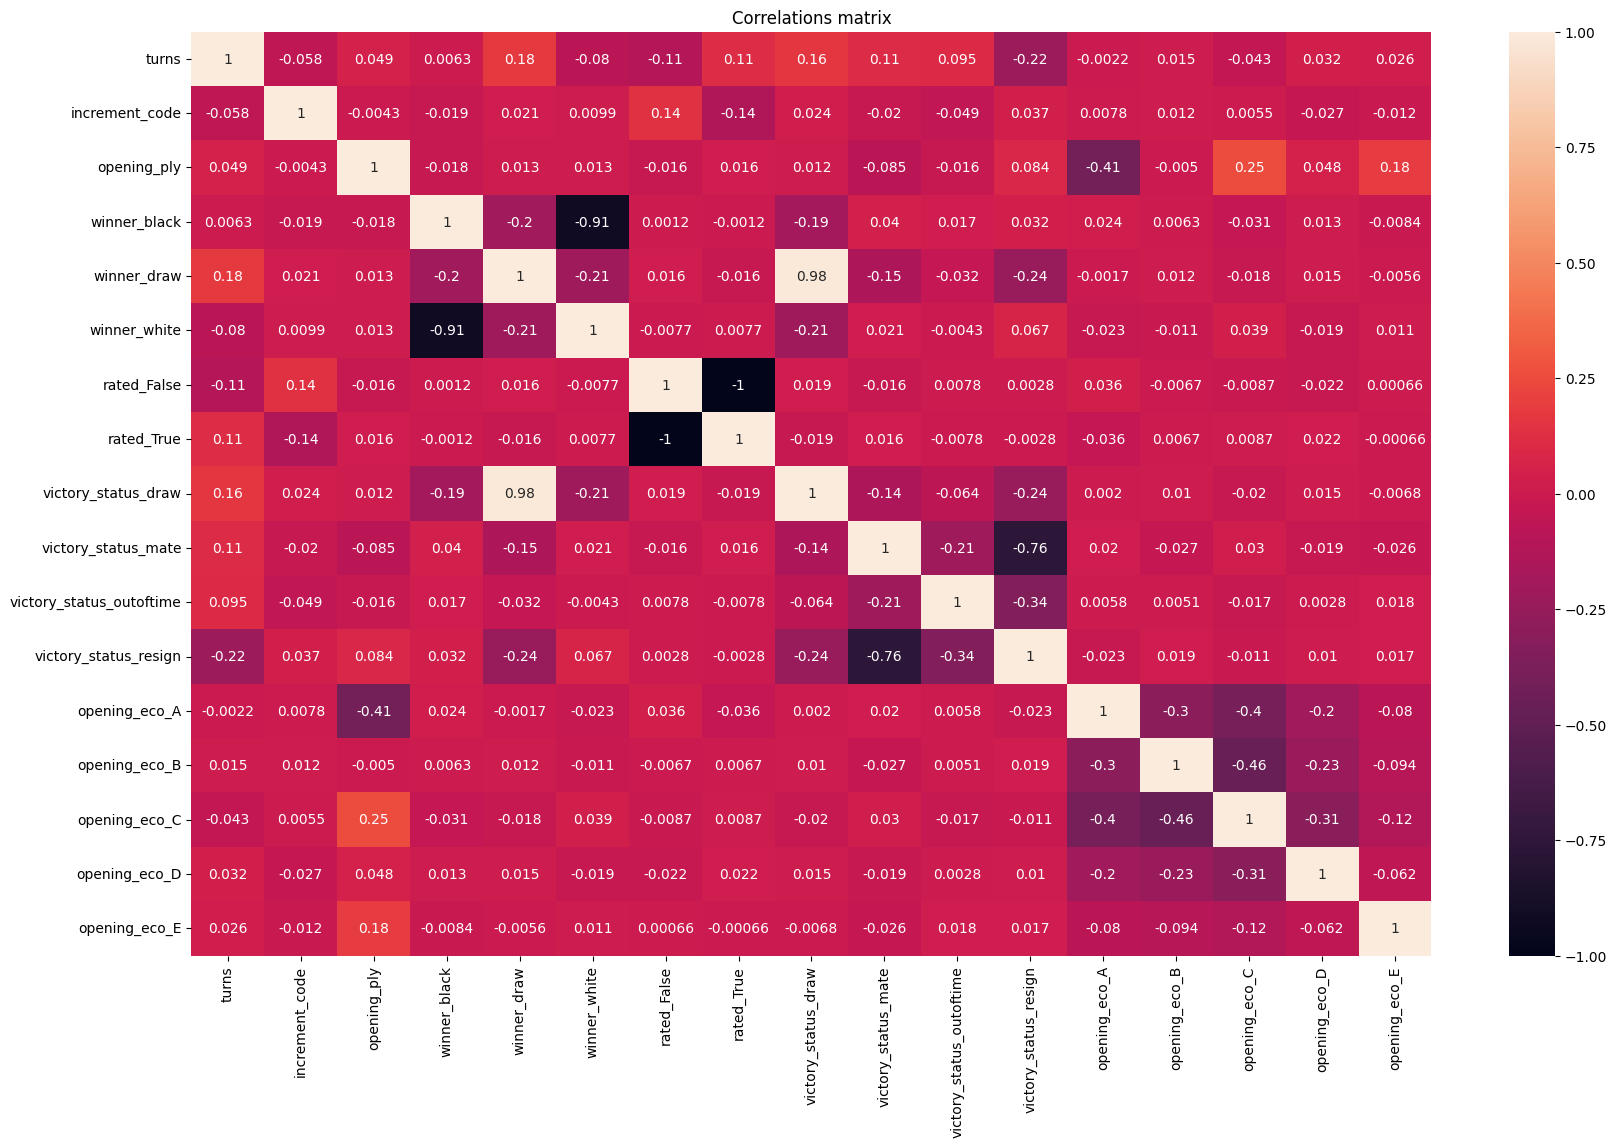

In [48]:
train_corr = X_train_prcsd.corr(numeric_only = True)
plt.figure(figsize=(20, 12)) #change size of figure
plt.title('Correlations matrix')
sns.heatmap(train_corr, annot = True) #correlation matrix



We can still see a very weak correlation between the columns. (not including the obvious one like rated false / true)

## <span dir=rtl>Preformance Evaluation - 7</span>

In [49]:
ax, best_params = helpers.plot_train_test_scores(gs, clf, scorer, X_train, X_test, y_train, y_test)

original plot duration: 00:42:55


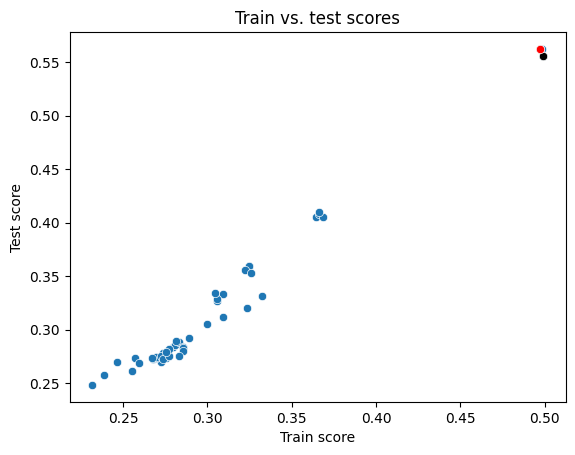

In [50]:
helpers.show_plot(ax) #figure

This is a good result, idealy the red and black dots should merge but in this graph they are very close. That means there is no overfitting and the scores are very close (test and train)

In [51]:
best_params['test'] #best params for test

{'classifier': KNeighborsClassifier(n_neighbors=7),
 'classifier__n_neighbors': 1,
 'preprocess__numerical__cap_outliers': Winsorizer(),
 'preprocess__numerical__standardize': StandardScaler()}

In [52]:
best_params['train'] #best params for train

{'classifier': KNeighborsClassifier(n_neighbors=7),
 'classifier__n_neighbors': 1,
 'preprocess__numerical__cap_outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x0000023D36A387C0>),
 'preprocess__numerical__standardize': MinMaxScaler()}

In [53]:
y_pred = helpers.predict(gs, X_test)

original predict duration: 00:00:00


In [54]:
print(classification_report(y_test, y_pred)) #classification report

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       506
           1       0.57      0.52      0.54       503
           2       0.53      0.56      0.54       471
           3       0.54      0.53      0.54       518
           4       0.54      0.57      0.55       507
           5       0.58      0.57      0.57       484

    accuracy                           0.56      2989
   macro avg       0.56      0.56      0.56      2989
weighted avg       0.56      0.56      0.56      2989



Accuracy = (TN + TP)/Total - how often is the classifier correct overall

Precision = (TP)/(TP + FP) - What portion of positive identifications was actually correct?

Recall = (TP)/(FN + TP) - What portion of actual positives was identified correctly?

F1 score = 2\*Precision\*Recall / Precision + Recall - balances between precision and recall

In [55]:
mean_absolute_error(y_test,y_pred) #the distance of the mis-classification from the real label.

np.float64(0.9431247908999666)

Bam!! that is a very good result! despite the low accuracy. We can say that, because the target column has a natural order than a deviation of about one category is a very good results.

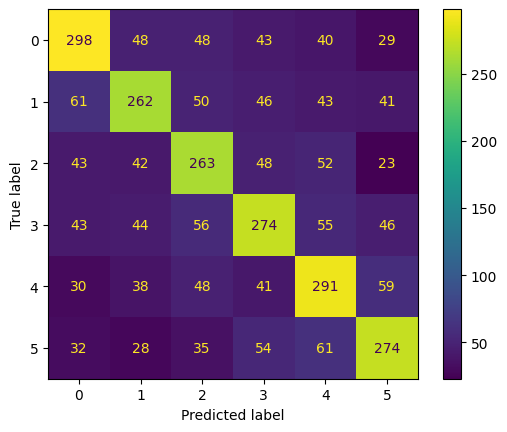

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) #confusion matrix

Pretty good for this problem (see more in summary). There are'nt many misclassifications.

## <span dir=rtl>Summary and Conclusions - 8</span>

In this project I tried to predict the elo of a game based on its features - which is a very hard task. My algorithm predicted the right elo about 50% of the time. This low accuracy was unsuprisng and expected. As can be seen from the line plots, this problem is continuos and linear / polynomial. Therefore, none of the classification algorithms studied in class, as well as performance appraisal that were learned in class are suitable to the problem because that the target colummn had a natural order. An evidence to this is the low mean_absolute_error that means that the algorithm was indeed pretty accurate. Furtherore, the problem that this classifier had to solve was quite hard, because there is no clear gap between the different ranges of elos and because of the game's dependence on the mind of the players - great players makes mistakes more than commonly believed.

I think this algorithm is very good for this problem and I did a pretty good job accounting for the difficulty of the problem.

To sum up, a different method should have been used to achieve a better result.



**self reflection:**

This project was one of the bigggest ones I have ever worked on, it required many hours as well as well a lot of thought. The strict rules of the project made it harder for me to do what I wanted to do and what I thought will help the project. Overall this was a very interesting project and this project left a taste for more.

